<a href="https://colab.research.google.com/github/ming80302/SOARS/blob/main/rd_csv_soar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read csv file and plot time series dataFrame
For Erin

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [6]:
# I uploaded data here
dir_i = '/content/drive/MyDrive/data/SOARS/'

### 1 Precipitation:
#### 1.1 Read and plot PRISM dataset time series

In [7]:
def plot_ts(flnm):
    '''
    flnm: prism data file name
    '''
    print('read in ', flnm)
 
    df_prism = pd.read_csv(flnm, header = None, delim_whitespace=True)

    # add column names and index
    df_prism.columns = ['date','prec']
 
    df_prism.index = df_prism.date
 
    # convert date index to DateTime index for the plot of x-axis 
    df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

    # convert pandas timestamp to datetime
    date_s = df_prism.index[0].to_pydatetime()
    date_e = df_prism.index[-1].to_pydatetime()
    print('from ', date_s, ' to ', date_e)

    df_prism.prec.plot();

read in  /content/drive/MyDrive/data/SOARS/prec_prism_ca.txt
from  2021-10-01 00:00:00  to  2021-11-30 00:00:00


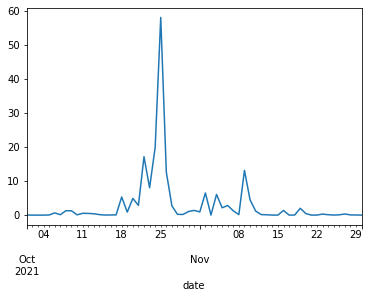

In [8]:
 plot_ts(dir_i + 'prec_prism_ca.txt')

read in  /content/drive/MyDrive/data/SOARS/prec_prism_monsoon.txt
from  2021-07-01 00:00:00  to  2021-08-31 00:00:00


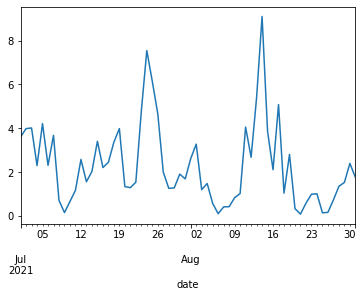

In [9]:
plot_ts(dir_i + 'prec_prism_monsoon.txt')

#### 1.2 Read and plot 50-ECMWF precipitation

In [11]:
def plot_ec_ts(flnm):
    '''
    flnm: ECMWF ensemble data file name
    '''
    print('read in ', flnm)
 
    df = pd.read_csv(flnm, header = None, delim_whitespace=True)

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df.columns = list

    # create index
    n_date = len(df)
 
    date_s = datetime.datetime(df.year[0], df.month[0], df.day[0],   0)
    date_e = datetime.datetime(df.year[n_date-1], df.month[n_date-1], df.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df.index = date_ind 

    data = df.iloc[:,3:]
    data.plot(legend=False);

read in  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt


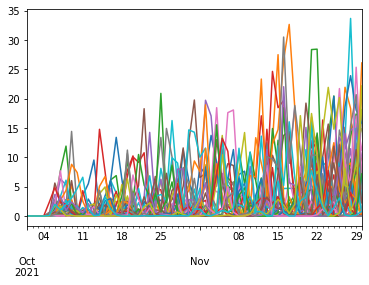

In [12]:
plot_ec_ts(dir_i + 'prec_ecmwf_ca.txt')

read in  /content/drive/MyDrive/data/SOARS/prec_ecmwf_monsoon.txt


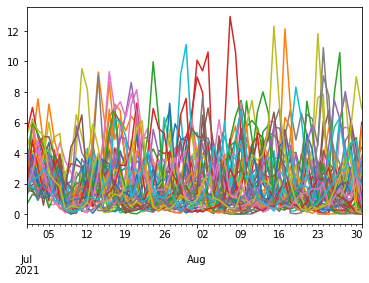

In [14]:
plot_ec_ts(dir_i + 'prec_ecmwf_monsoon.txt')

#### 1.3 plot accumulated precipitation

In [16]:
def plot_cumsum_ec(flnm_ec, flnm_prism):
    '''
    flnm_ec: ensemble data file name
    flnm_prism: obs file name
    '''
    # plot accumulated precipitation
    print('read ', flnm_ec)
 
    df_ec = pd.read_csv(flnm_ec, header = None, delim_whitespace=True)
    df_prism = pd.read_csv(flnm_prism, header = None, delim_whitespace=True)
    # add column names and index
    df_prism.columns = ['date','prec']
    df_prism.index = df_prism.date
 
    # convert date index to DateTime index for the plot of x-axis 
    df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_ec.index = date_ind 

    data = df_ec.iloc[:,3:]

    pr_cumsum_ecmwf = np.cumsum(data.values, axis=0)
    pr_cumsum_ecmwf_perc = np.percentile(pr_cumsum_ecmwf, (10,50,90), axis=1)
    pr_cumsum_obs = np.cumsum(df_prism.prec.values)

    plt.plot(data.index, pr_cumsum_ecmwf_perc[1,:], c='k', lw=2, label = 'Median ECMWF')
    plt.fill_between(data.index, pr_cumsum_ecmwf_perc[0,:], pr_cumsum_ecmwf_perc[2,:], color='k', alpha=0.3, label = 'P10-P90 ECMWF')
    plt.plot(data.index, pr_cumsum_obs, c='r', lw=2, label = 'Observations')
    plt.ylabel('Accumulated Precipitation [mm]')
    plt.xticks(rotation = 90)
    plt.legend()

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt


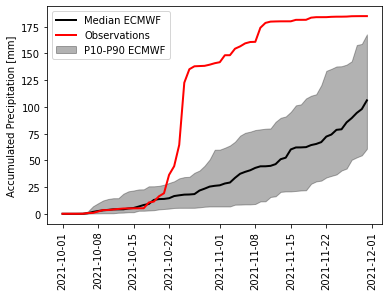

In [17]:
plot_cumsum_ec(dir_i + 'prec_ecmwf_ca.txt', dir_i + 'prec_prism_ca.txt')

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_monsoon.txt


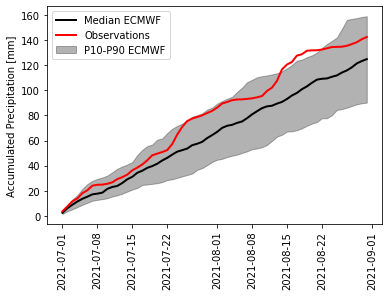

In [18]:
plot_cumsum_ec(dir_i + 'prec_ecmwf_monsoon.txt', dir_i + 'prec_prism_monsoon.txt')

#### 1.4 precipitation spread

In [20]:
def plot_en_spread(flnm_ec, flnm_prism):
    
    print('read ', flnm_ec)
 
    df_ec = pd.read_csv(flnm_ec, header = None, delim_whitespace=True)
    df_prism = pd.read_csv(flnm_prism, header = None, delim_whitespace=True)
    # add column names and index
    df_prism.columns = ['date','prec']
    df_prism.index = df_prism.date
 
    # convert date index to DateTime index for the plot of x-axis 
    df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_ec.index = date_ind 

    data = df_ec.iloc[:,3:]

    pr_ecmwf = df_ec.iloc[:,:50].values
    pr_ecmwf_percentiles = np.percentile(pr_ecmwf, (10,25,50,75,90), axis=1)
    plt.plot(data.index, pr_ecmwf_percentiles[2,:], c='k', lw=2, label = 'Median ECMWF')
    plt.fill_between(data.index, pr_ecmwf_percentiles[0,:], pr_ecmwf_percentiles[4,:], color='k', alpha=0.3, label = 'P10-P90 ECMWF')
    plt.fill_between(data.index, pr_ecmwf_percentiles[1,:], pr_ecmwf_percentiles[3,:], color='k', alpha=0.3, label = 'P25-P75 ECMWF')
    plt.plot(data.index, df_prism.prec.values, c='r', lw=2, label = 'Observations')
    plt.ylabel('Precipitation [mm/d]')
    plt.xticks(rotation = 90)
    plt.legend()

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt


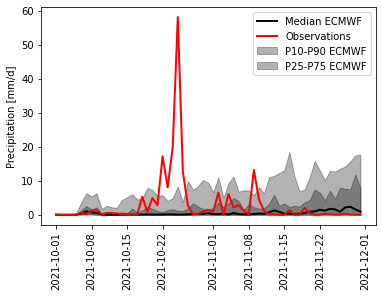

In [21]:
plot_en_spread(dir_i + 'prec_ecmwf_ca.txt', dir_i + 'prec_prism_ca.txt')

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_monsoon.txt


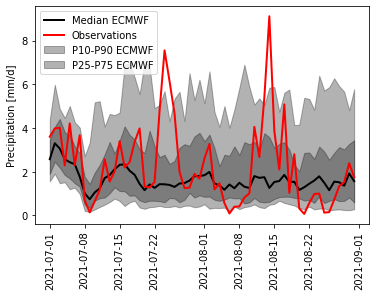

In [22]:
plot_en_spread(dir_i + 'prec_ecmwf_monsoon.txt', dir_i + 'prec_prism_monsoon.txt')

 #### 1.5 plot precipitation of specific member and overlay PRISM dataset

In [ ]:
def plot_1ec_prism(flnm_ec, flnm_prism, i_mem):
    '''
    specific member overlay prism
    '''

    print('read ', flnm_ec, ' member ', i_mem,  'and ', flnm_prism)
 
    df_ec = pd.read_csv(flnm_ec, header = None, delim_whitespace=True)
    df_prism = pd.read_csv(flnm_prism, header = None, delim_whitespace=True)
    # add column names and index
    df_prism.columns = ['date','prec']
    df_prism.index = df_prism.date
 
    # convert date index to DateTime index for the plot of x-axis 
    df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_ec.index = date_ind 

    #data = df_ec.iloc[:,3:]
     
    data = df_ec.iloc[:, i_mem]
    data.plot()
    df_prism.prec.plot(color='black');

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt  member  45 and  /content/drive/MyDrive/data/SOARS/prec_prism_ca.txt


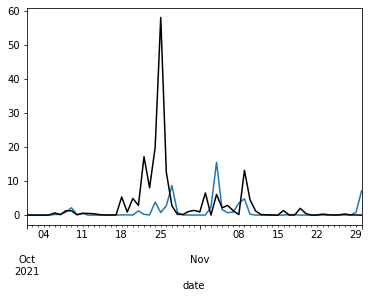

In [ ]:
plot_1ec_prism(dir_i + 'prec_ecmwf_ca.txt', dir_i + 'prec_prism_ca.txt', 45)

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_monsoon.txt  member  45 and  /content/drive/MyDrive/data/SOARS/prec_prism_monsoon.txt


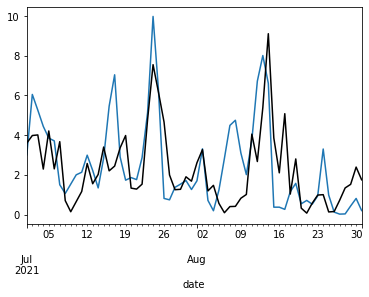

In [ ]:
plot_1ec_prism(dir_i + 'prec_ecmwf_monsoon.txt', dir_i + 'prec_prism_monsoon.txt', 45)

### 2  Weather type analysis
#### 2.1 ERA5

In [23]:
def plot_wt_his(flnm):
    print('read ', flnm)
 
    df_era5 = pd.read_csv(flnm, header = None, delim_whitespace=True)
    #print(df_era5.head())

    # add column names and index
    df_era5.columns = ['year', 'month','day', 'WT']

    # create index
    n_date = len(df_era5)
 
    date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
    date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

    print(date_s, '-', date_e)
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_era5.index = date_ind

    n_unique=np.unique(df_era5.WT.values)
    n_unique
    print(n_unique)
    df_era5.WT.hist(bins=12);


read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
[ 1  2  3  4  5  6  7  8  9 10 11 12]


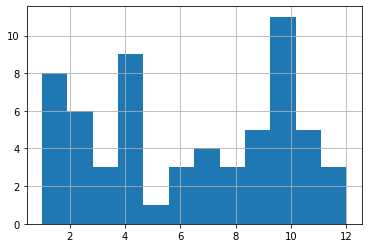

In [ ]:
plot_wt_his(dir_i + 'wt_era5_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca_old.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
[ 1  2  3  4  5  6  7  8  9 10 11]


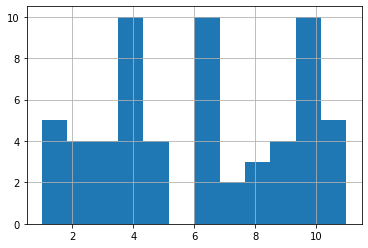

In [ ]:
plot_wt_his(dir_i + 'wt_era5_ca_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
[ 9 12]


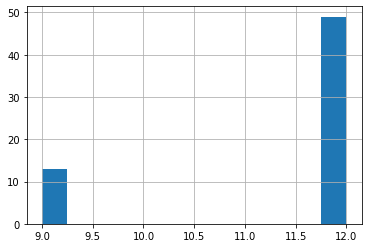

In [ ]:
plot_wt_his(dir_i + 'wt_era5_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon_old.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
[ 2  9 12]


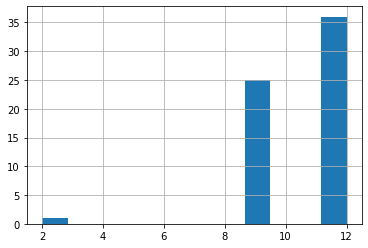

In [ ]:
plot_wt_his(dir_i + 'wt_era5_monsoon_old.txt')

In [ ]:
def wt_ts_era5(flnm):
    print('read ', flnm)
 
    df_era5 = pd.read_csv(flnm, header = None, delim_whitespace=True)
    #print(df_era5.head())

    # add column names and index
    df_era5.columns = ['year', 'month','day', 'WT']

    # create index
    n_date = len(df_era5)
 
    date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
    date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

    print(date_s, '-', date_e)
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_era5.index = date_ind

    #convert date index to DateTime index for the plot of x-axis 
    df_era5.index = pd.to_datetime(df_era5.index)
    df_era5.WT.plot();


read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00


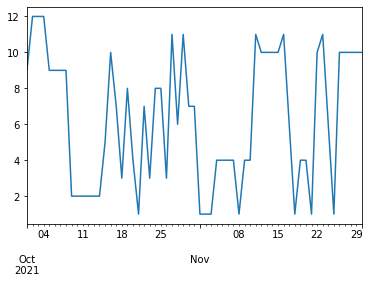

In [ ]:
wt_ts_era5(dir_i + 'wt_era5_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca_old.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00


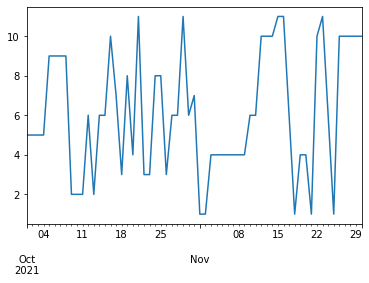

In [ ]:
wt_ts_era5(dir_i + 'wt_era5_ca_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00


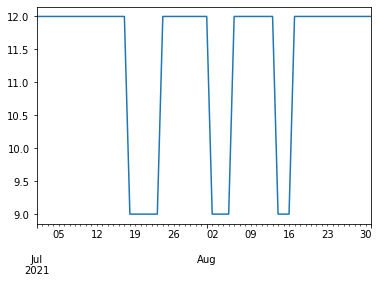

In [ ]:
wt_ts_era5(dir_i + 'wt_era5_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon_old.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00


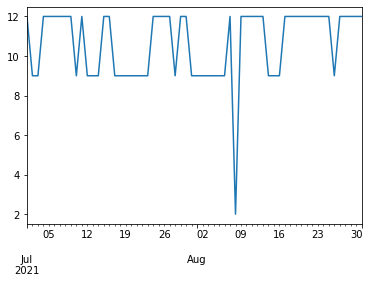

In [ ]:
wt_ts_era5(dir_i + 'wt_era5_monsoon_old.txt')

#### 2.2 ECMWF weather type

In [ ]:
def plot_wt_his_ec(flnm):
    print('read ', flnm)
 
    df_ec = pd.read_csv(flnm, header = None, delim_whitespace=True)

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d') 
    df_ec.index = date_ind 
    #print(df_ec.head)

    data = df_ec.iloc[:,3:].values.flatten() ##.stack()
    n_unique = np.unique(data)
    print(n_unique, '------')

    fig = plt.figure(figsize =(10, 7))
 
    plt.hist(data, bins = 12);

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt
[ 1  2  3  4  5  6  7  8  9 10 11 12] ------


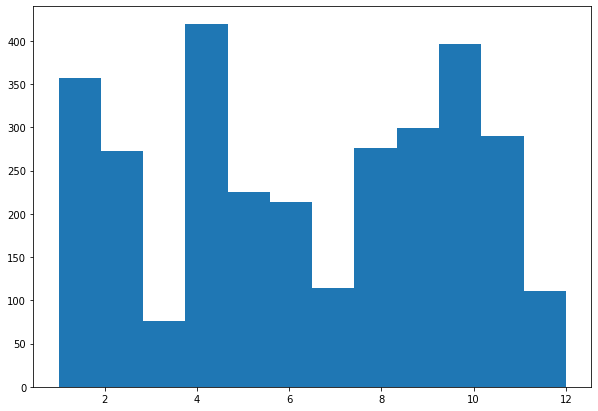

In [ ]:
plot_wt_his_ec(dir_i + 'wt_ecmwf_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca_old.txt
[ 1  2  3  4  5  6  7  8  9 10 11 12] ------


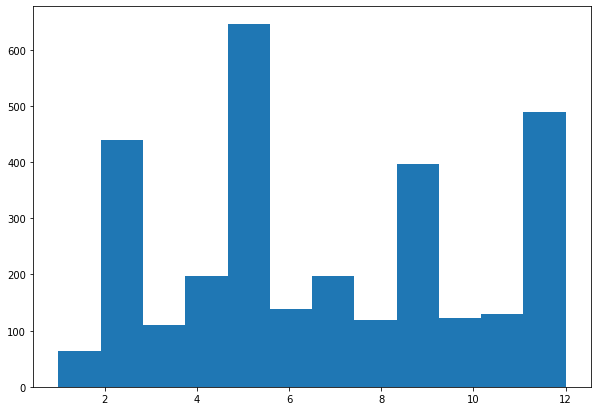

In [ ]:
plot_wt_his_ec(dir_i + 'wt_ecmwf_ca_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon.txt
[ 2  9 12] ------


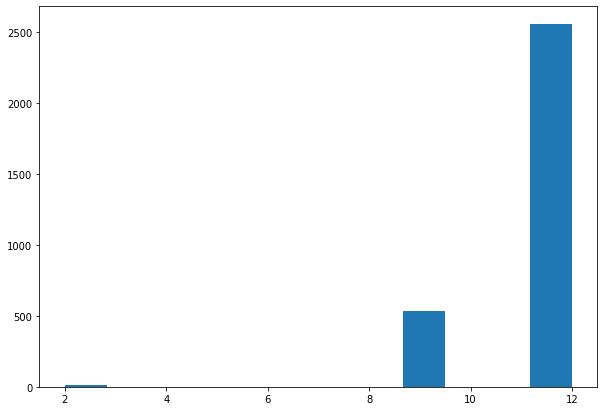

In [ ]:
plot_wt_his_ec(dir_i + 'wt_ecmwf_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon_old.txt
[ 2  5  9 12] ------


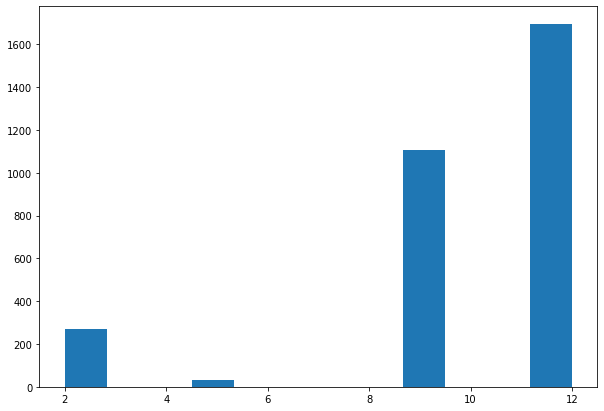

In [ ]:
plot_wt_his_ec(dir_i + 'wt_ecmwf_monsoon_old.txt')

In [ ]:
def plot_ec_en(flnm):
    print('read ', flnm)
 
    df_ec = pd.read_csv(flnm, header = None, delim_whitespace=True)

    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d') 
    df_ec.index = date_ind 
    data_p = df_ec.iloc[:,3:54]
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    data_p.hist(ax=ax);

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


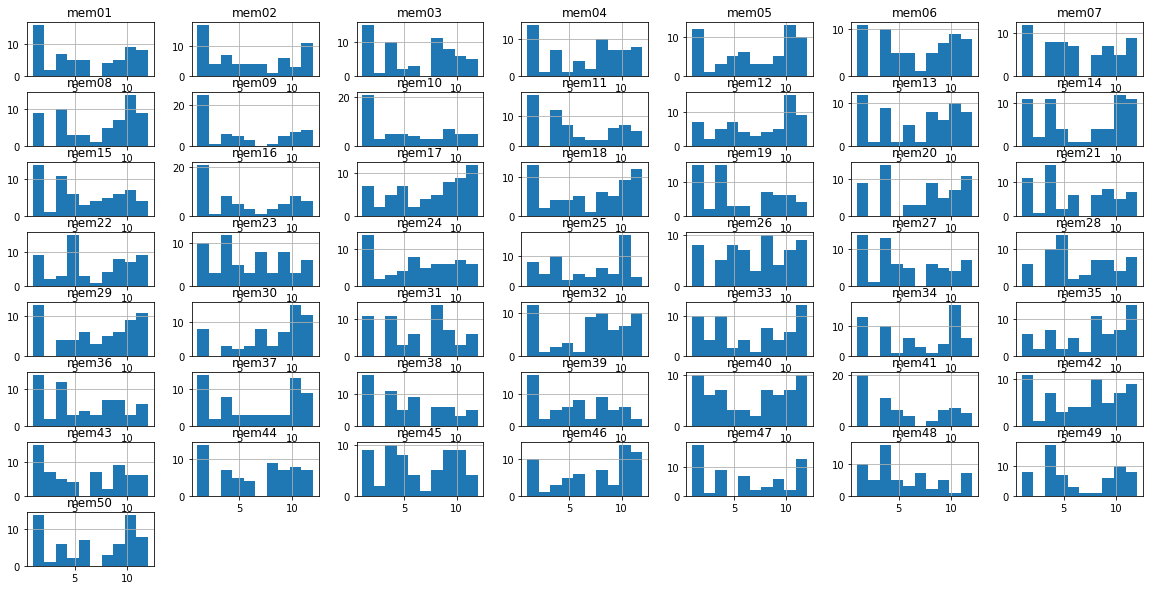

In [ ]:
plot_ec_en(dir_i + 'wt_ecmwf_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca_old.txt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


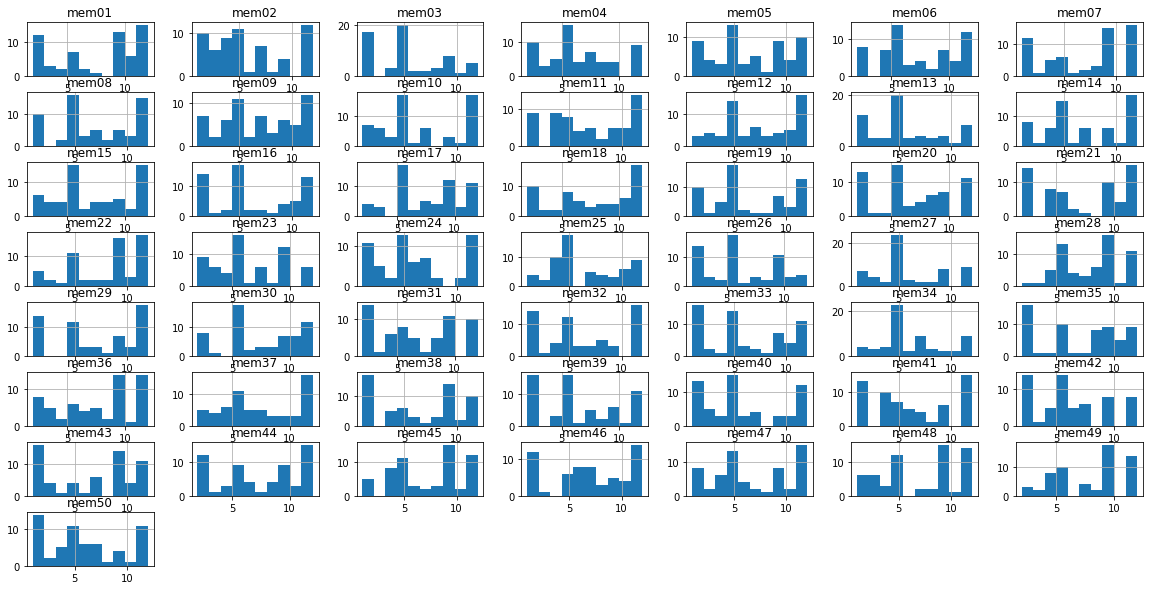

In [ ]:
plot_ec_en(dir_i + 'wt_ecmwf_ca_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon.txt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


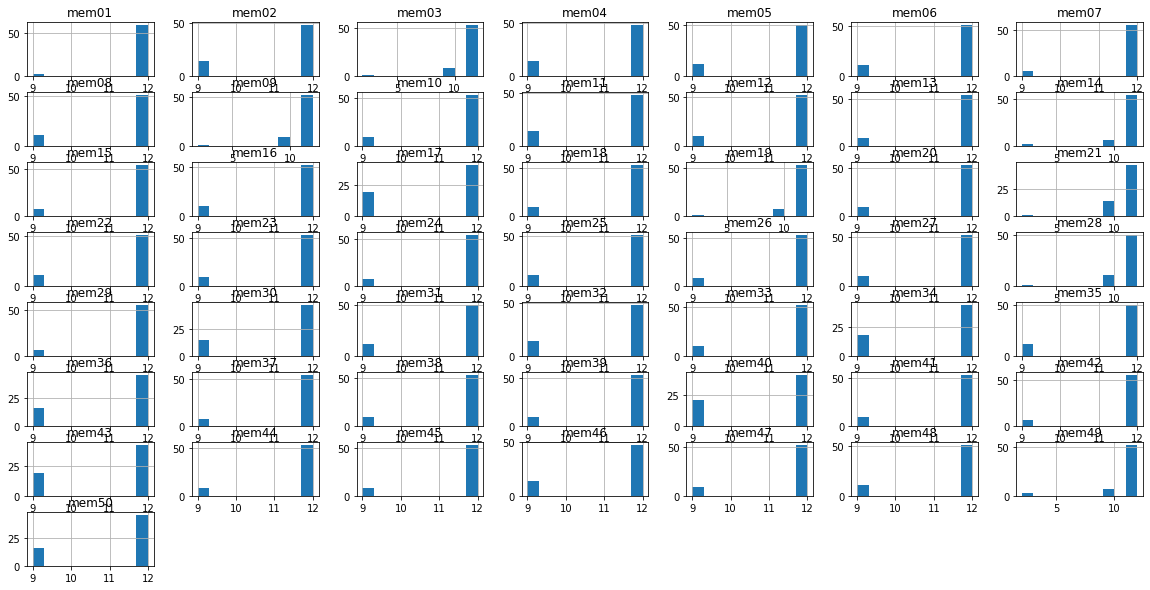

In [ ]:
plot_ec_en(dir_i + 'wt_ecmwf_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon_old.txt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


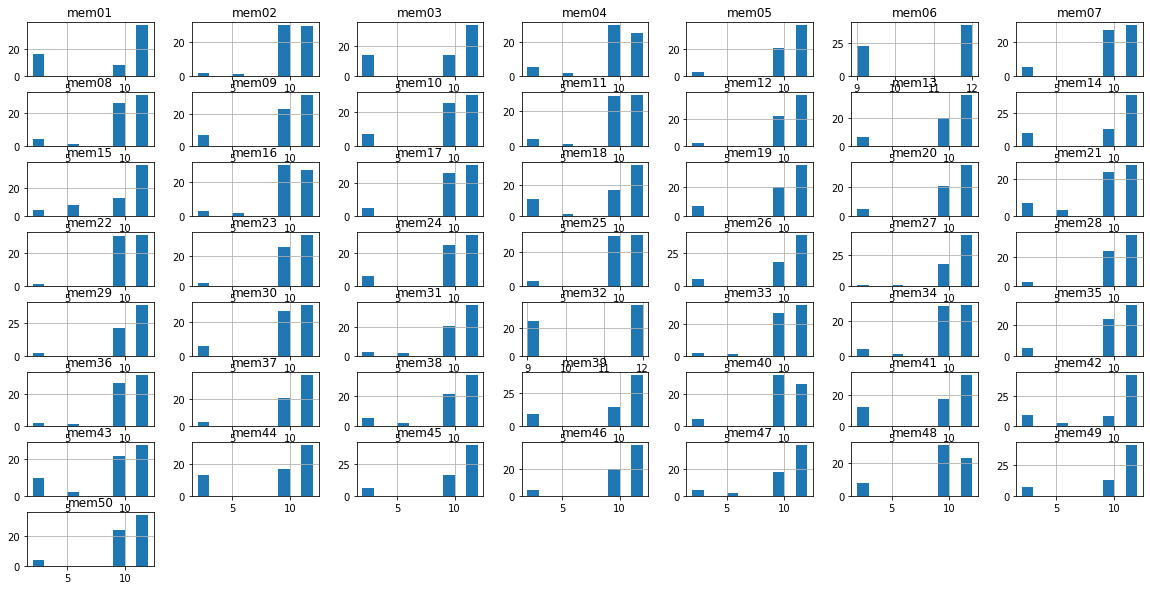

In [ ]:
plot_ec_en(dir_i + 'wt_ecmwf_monsoon_old.txt')

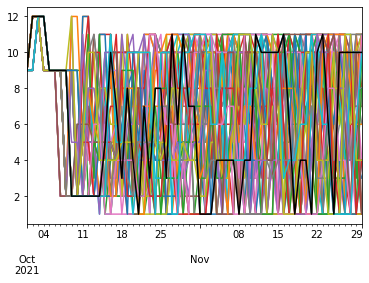

In [ ]:
# Time Series plot
data = df_ec.iloc[:,3:]
data.plot(legend=False);
df_era5.WT.plot(color='black')

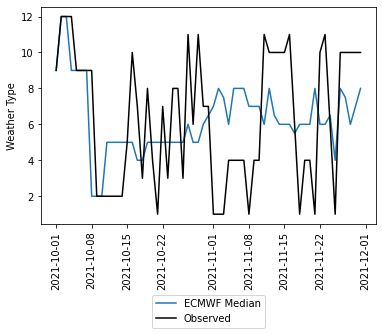

In [ ]:
# Time Series plot
data = np.median(np.array(df_ec.iloc[:,3:]), axis=1,)
plt.plot(df_era5.WT.index, data, label = 'ECMWF Median');
plt.plot(df_era5.WT.index, df_era5.WT.values, c='k',label='Observed')
plt.xticks(rotation = 90)
plt.ylabel('Weather Type')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc = 'lower center')

#### 2.3 ERA5 VS. ensemble mode

In [ ]:
def most_frequent(List):
    return max(set(List), key = List.count)

def plot_mode(flnm_ec, flnm_era5):

    print('read ', flnm_era5)
    df_era5 = pd.read_csv(flnm_era5, header = None, delim_whitespace=True)
     
    # add column names and index
    df_era5.columns = ['year', 'month','day', 'WT']

    # create index
    n_date = len(df_era5)
 
    date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
    date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

    print(date_s, '-', date_e)
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_era5.index = date_ind

    #convert date index to DateTime index for the plot of x-axis 
    df_era5.index = pd.to_datetime(df_era5.index)

    print('read ', flnm_ec)
 
    df_ec = pd.read_csv(flnm_ec, header = None, delim_whitespace=True)
    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d') 
    df_ec.index = date_ind 

    data = np.zeros(len(df_ec))
 
    bb = df_ec.iloc[:,3:].values
    for nd in range(len(df_ec)):
        mylist = bb[nd].tolist()
        data[nd] = most_frequent(mylist)
   

    plt.plot(df_era5.WT.index, data, label = 'ECMWF Mode');
    plt.plot(df_era5.WT.index, df_era5.WT.values,  c='k',label='Observed')
    plt.xticks(rotation = 90)
    plt.ylabel('Weather Type')
    plt.legend(bbox_to_anchor=(0.5, -0.5), loc = 'lower center')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon.txt


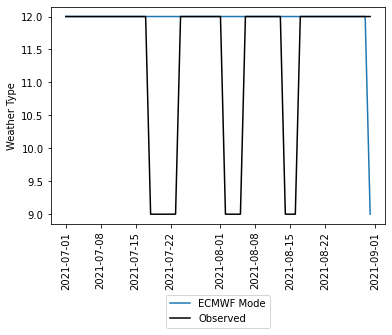

In [ ]:
plot_mode(dir_i + 'wt_ecmwf_monsoon.txt', dir_i + 'wt_era5_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon_old.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon_old.txt


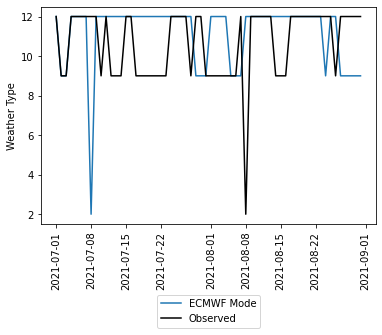

In [ ]:
plot_mode(dir_i + 'wt_ecmwf_monsoon_old.txt', dir_i + 'wt_era5_monsoon_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt


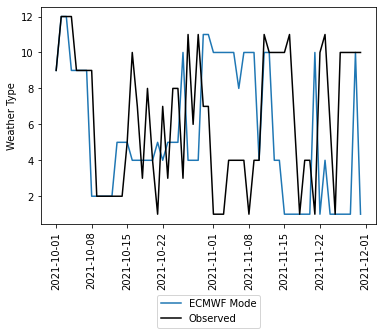

In [ ]:
plot_mode(dir_i + 'wt_ecmwf_ca.txt', dir_i + 'wt_era5_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca_old.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca_old.txt


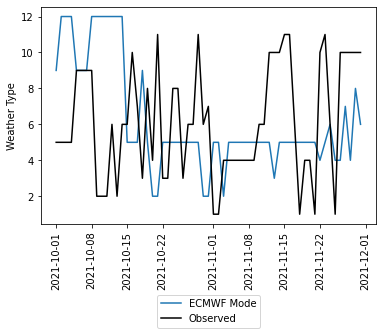

In [ ]:
plot_mode(dir_i + 'wt_ecmwf_ca_old.txt', dir_i + 'wt_era5_ca_old.txt')

In [ ]:
def plot_mode_scatter(flnm_ec, flnm_era5):

    print('read ', flnm_era5)
    df_era5 = pd.read_csv(flnm_era5, header = None, delim_whitespace=True)
     
    # add column names and index
    df_era5.columns = ['year', 'month','day', 'WT']

    # create index
    n_date = len(df_era5)
 
    date_s = datetime.datetime(df_era5.year[0], df_era5.month[0], df_era5.day[0],   0)
    date_e = datetime.datetime(df_era5.year[n_date-1], df_era5.month[n_date-1], df_era5.day[n_date-1], 23)

    print(date_s, '-', date_e)
    date_ind=pd.date_range(date_s, date_e, freq='d')
    df_era5.index = date_ind

    #convert date index to DateTime index for the plot of x-axis 
    df_era5.index = pd.to_datetime(df_era5.index)

    print('read ', flnm_ec)
 
    df_ec = pd.read_csv(flnm_ec, header = None, delim_whitespace=True)
    # create column names for dateFrame
    list = ['year','month', 'day']
    for nm in range(1,51):
          mem = 'mem' + '%02d'%nm
          list.append(mem)

    df_ec.columns = list

    # create index
    n_date = len(df_ec)
 
    # create index
    n_date = len(df_ec)
 
    date_s = datetime.datetime(df_ec.year[0], df_ec.month[0], df_ec.day[0],   0)
    date_e = datetime.datetime(df_ec.year[n_date-1], df_ec.month[n_date-1], df_ec.day[n_date-1], 23)
 
    date_ind=pd.date_range(date_s, date_e, freq='d') 
    df_ec.index = date_ind 

    data = np.zeros(len(df_ec))
 
    bb = df_ec.iloc[:,3:].values
    for nd in range(len(df_ec)):
        mylist = bb[nd].tolist()
        data[nd] = most_frequent(mylist)
   

    plt.plot(df_era5.WT.index, data, 'o', alpha=0.6, label = 'ECMWF Mode');
    plt.plot(df_era5.WT.index, df_era5.WT.values, 'x', alpha=0.5, c='k',label='Observed')
    plt.xticks(rotation = 90)
    plt.ylabel('Weather Type')
    plt.legend(bbox_to_anchor=(0.5, -0.5), loc = 'lower center')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca.txt


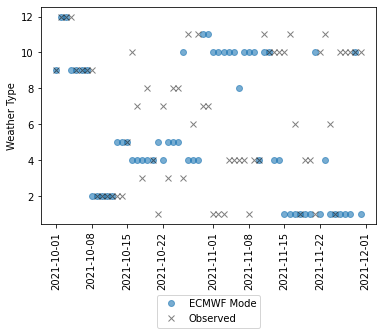

In [ ]:
plot_mode_scatter(dir_i + 'wt_ecmwf_ca.txt', dir_i + 'wt_era5_ca.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_ca_old.txt
2021-10-01 00:00:00 - 2021-11-30 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_ca_old.txt


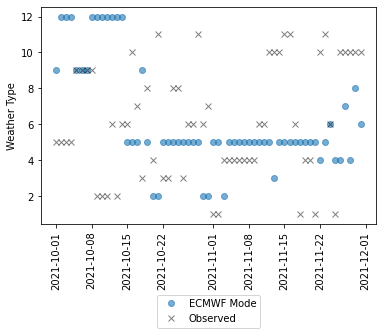

In [ ]:
plot_mode_scatter(dir_i + 'wt_ecmwf_ca_old.txt', dir_i + 'wt_era5_ca_old.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon.txt


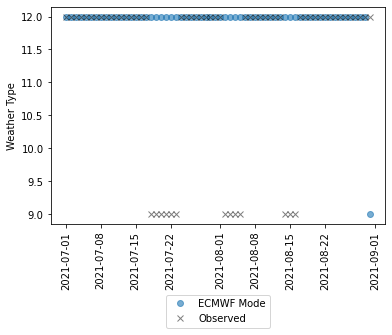

In [ ]:
plot_mode_scatter(dir_i + 'wt_ecmwf_monsoon.txt', dir_i + 'wt_era5_monsoon.txt')

read  /content/drive/MyDrive/data/SOARS/wt_era5_monsoon_old.txt
2021-07-01 00:00:00 - 2021-08-31 23:00:00
read  /content/drive/MyDrive/data/SOARS/wt_ecmwf_monsoon_old.txt


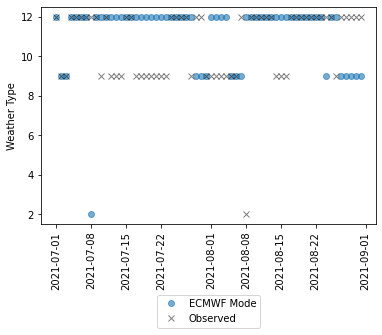

In [ ]:
plot_mode_scatter(dir_i + 'wt_ecmwf_monsoon_old.txt', dir_i + 'wt_era5_monsoon_old.txt')